# Data Analysis for Flow channel

### Required python libraries

In [6]:
import os
import numpy as np
import mne
import heartpy as hp
import matplotlib.pyplot as plt
from scipy.signal import butter, freqs, filtfilt, find_peaks
from os import listdir
from os.path import isfile, join
import pandas as pd
import statistics

### Importing .edf File

In [7]:
file = "../BINEESHBOI~ PS_0c6dd4b6-a130-414d-b54b-b9a8205af46a.edf"
data = mne.io.read_raw_edf(file)

Extracting EDF parameters from F:\Dataset\BINEESHBOI~ PS_0c6dd4b6-a130-414d-b54b-b9a8205af46a.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


### Extracting data from the file

In [5]:
raw_data = data.get_data()
info = data.info
del data
# Un-comment the below code to view the data fields

# print(info)

NameError: name 'data' is not defined

In [4]:
# flow = raw_data[33]    # Print the data from Flow channel
# print(flow)
# Better list containing data
# Un-comment the below code for viewing the flow channel data

# for i in flow:
#     print(i)
def channel_id(channel, val):   
    j =0
    for i in channel:
        if(i == val):
            return j
        j+=1

flow = raw_data[channel_id(data_channel, "FLOW")]
flow = flow[:]



NameError: name 'data_channel' is not defined

In [14]:
# CHEST
def channel_id(channel, val):   
    j =0
    for i in channel:
        if(i == val):
            return j
        j+=1

flow = raw_data[channel_id(data_channel, "CHEST")]
flow = flow[:]


In [ ]:
# ABD
def channel_id(channel, val):   
    j =0
    for i in channel:
        if(i == val):
            return j
        j+=1

flow = raw_data[channel_id(data_channel, "ABD")]
flow = flow[130000:300000]


In [ ]:
# import plotly.graph_objects as go
# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected=True)
#  Butter Worth Filter
fs = 256
fc = 0.5
b, a = butter(6, fc/(fs/2), 'low', analog=False)

# Filtering the signal
y = filtfilt(b, a, flow)

peaks, _ = find_peaks(y, distance = 150, height=0)
peaks_num = (len(peaks))                             # Contains the total no. of peaks
plt..plot(y, 'b-', linewidth = 1)
plt.plot(peaks, y[peaks], "*", color="red")          # Plotting the peak points

plt.show()


n = len(flow)
print(n)
print(n/120)
new_var = len(peaks)


# print(n)
duration_sec = n / fs
duration_min = duration_sec / 60


avg = new_var / duration_min

print("Beats per minute: ", round(avg))
print("Number of spikes per minute: ", round(peaks_num, 2))


### Filtering flow signal

c:\users\arjun\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



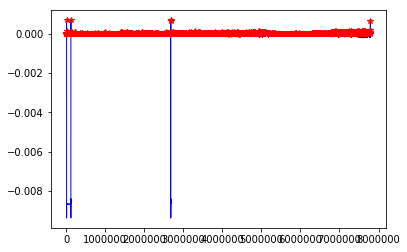

7795200
64960.0
Beats per minute:  12
Number of spikes per minute:  6107


In [17]:
#  Butter Worth Filter
fs = 256
fc = 0.5
b, a = butter(6, fc/(fs/2), 'low', analog=False)

# Filtering the signal
y = filtfilt(b, a, flow)

peaks, _ = find_peaks(y, distance = 150, height=0)
peaks_num = (len(peaks))                             # Contains the total no. of peaks
plt.plot(y, 'b-', linewidth = 1)
plt.plot(peaks, y[peaks], "*", color="red")          # Plotting the peak points
# fig1 = plt.gfc()
plt.show()                                           # Plotting the flow channel data


n = len(flow)
print(n)
print(n/120)
new_var = len(peaks)


# print(n)
duration_sec = n / fs
duration_min = duration_sec / 60


avg = new_var / duration_min

print("Beats per minute: ", round(avg))
print("Number of spikes per minute: ", round(peaks_num, 2))


### Peak Interval Time

Peak interval Average percentage:  117.91391618729709


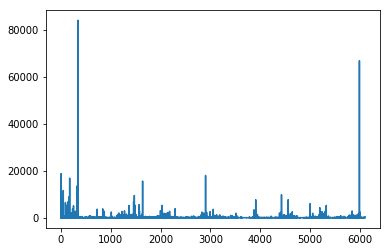

In [19]:
    inter_peak_interval = []
    inter_peak_interval_index = []

    for i in range(0, len(y[peaks]) - 1):
#         inter_peak_interval.append(((y[peaks][i + 1] - y[peaks][i])))
        inter_peak_interval.append(((y[peaks][i + 1] - y[peaks][i])/y[peaks][i]) * 100)

        inter_peak_interval_index.append(i)

    ipi_mean = np.array(inter_peak_interval).mean()
    print('Peak interval Average percentage: ', ipi_mean)


    plt.plot(inter_peak_interval_index, inter_peak_interval)

### Average Peak Value

In [ ]:
peak_mean= np.array(y[peaks]).mean()
print(np.array(y[peaks]).mean())

print(file.split('.')[0])

### Save as CSV

In [ ]:
# np.savetxt('data.csv', (peaks_num, flow_mean))


df = pd.DataFrame([])
data = [[file,len(flow),dur,round(peaks_num),bpm_avg,ipt_mean,avg_peak]]

df1 = pd.DataFrame(data,columns=['File Name','Signal Length','Duration','Beat Count','BPM','Peak Interval Avg','Peak Time Avg'])
df = df.append(df1,  ignore_index = True)
print(df)
df.to_csv("Stats_temp.csv", encoding='utf-8', index=False)